In [1]:
# Perform data engineering on the Auto MPG regression dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# show all plots inline in notebook (instead of interactive)
# Interactive plot (can click around):
#%matplotlib notebook
# Non-interactive plot:
%matplotlib inline

In [3]:
# load data and add header


In [4]:
# fix header
# fix spaces separator

colnames = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
 'acceleration', 'model year', 'origin', 'car name']

df = pd.read_csv('./auto-mpg/auto-mpg/auto-mpg.data.txt',
                header=None, names=colnames,
                sep='\s+') # \s: regular expression for space
                           # \s+: at least 1 space

df # if you look below, there is a '?' value not correctly parsed

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl


In [5]:
df.info() # note: horsepower      398 non-null object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null float64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [7]:
# fix after loading
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [8]:
# load the dataset but with correct NaN handling
df = pd.read_csv('./auto-mpg/auto-mpg/auto-mpg.data.txt',
                header=None, names=colnames,
                sep='\s+',
                na_values=['?']) # add ? to be recognised as NaN
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [9]:
df[df.isna().any(axis=1)]

# df.isna().any(axis=1) returns True if a row has missing values
#
# mask = df.isna().any(axis=1)
# df[mask] return only the True rows (masking)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,NaN,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035.0,20.5,82,1,amc concord dl


In [10]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [11]:
# exclude car name column

# this returns a copy
# df1 = df.drop(['car name'], axis=1) # axis=1 for column

# change the original
df.drop(['car name'], axis=1, inplace=True)

In [12]:
# clean missing data

In [13]:
df['horsepower'].unique() # nan appears here as well

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [14]:
# option 1: drop rows with NaN values

In [15]:
df1 = df.dropna()
df1[df1.isna().any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin


In [16]:
df.dropna(axis=1) # usually avoid this, entire column gone!

,mpg,cylinders,displacement,weight,acceleration,model year,origin
0,18.0,8,307.0,3504.0,12.0,70,1
1,15.0,8,350.0,3693.0,11.5,70,1
2,18.0,8,318.0,3436.0,11.0,70,1
3,16.0,8,304.0,3433.0,12.0,70,1
4,17.0,8,302.0,3449.0,10.5,70,1
5,15.0,8,429.0,4341.0,10.0,70,1
6,14.0,8,454.0,4354.0,9.0,70,1
7,14.0,8,440.0,4312.0,8.5,70,1
8,14.0,8,455.0,4425.0,10.0,70,1
9,15.0,8,390.0,3850.0,8.5,70,1


In [17]:
df1['horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
       100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,  65.,
        69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137., 158.,
       167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,  78.,
        52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,  81.,
        79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,  48.,
        66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62., 132.,
        84.,  64.,  74., 116.,  82.])

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
acceleration    392 non-null float64
model year      392 non-null int64
origin          392 non-null int64
dtypes: float64(5), int64(3)
memory usage: 27.6 KB


In [19]:
# df.dropna() targets entire dataframe
# if just want to target 1 column

hp_series = df['horsepower'].dropna()
hp_series # returns a pandas series (single column)

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
5      198.0
6      220.0
7      215.0
8      225.0
9      190.0
10     170.0
11     160.0
12     150.0
13     225.0
14      95.0
15      95.0
16      97.0
17      85.0
18      88.0
19      46.0
20      87.0
21      90.0
22      95.0
23     113.0
24      90.0
25     215.0
26     200.0
27     210.0
28     193.0
29      88.0
       ...  
367     88.0
368     88.0
369     88.0
370     85.0
371     84.0
372     90.0
373     92.0
375     74.0
376     68.0
377     68.0
378     63.0
379     70.0
380     88.0
381     75.0
382     70.0
383     67.0
384     67.0
385     67.0
386    110.0
387     85.0
388     92.0
389    112.0
390     96.0
391     84.0
392     90.0
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 392, dtype: float64

In [20]:
# option 2: interpolate

In [21]:
df1 = df.interpolate() # finds all NaN values and linear interp
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [22]:
index = df[df.isna().any(axis=1)].index
print(index)
df1.iloc[index]

Int64Index([32, 126, 330, 336, 354, 374], dtype='int64')


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,97.5,2046.0,19.0,71,1
126,21.0,6,200.0,97.5,2875.0,17.0,74,1
330,40.9,4,85.0,67.0,1835.0,17.3,80,2
336,23.6,4,140.0,80.0,2905.0,14.3,80,1
354,34.5,4,100.0,74.5,2320.0,15.8,81,2
374,23.0,4,151.0,83.0,3035.0,20.5,82,1


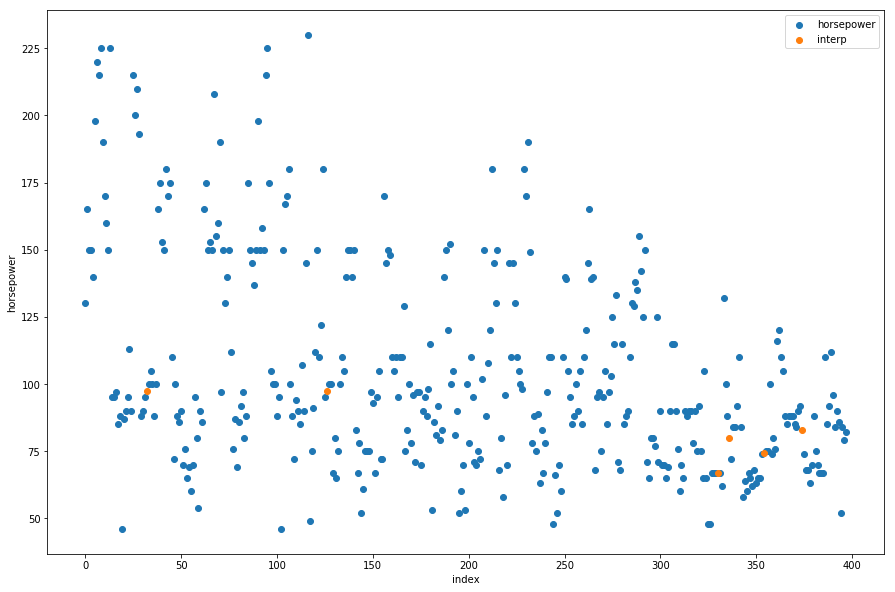

In [23]:
# plot before and after

# 1. plot original df horsepower
# 2. add the interpolated values

fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(df['horsepower'].index, df['horsepower'])
ax.set(xlabel='index', ylabel='horsepower')

ax.scatter(index, df1.iloc[index]['horsepower'], label='interp')
ax.legend()

In [24]:
df1.iloc[pd.RangeIndex(28, 34)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
28,9.0,8,304.0,193.0,4732.0,18.5,70,1
29,27.0,4,97.0,88.0,2130.0,14.5,71,3
30,28.0,4,140.0,90.0,2264.0,15.5,71,1
31,25.0,4,113.0,95.0,2228.0,14.0,71,3
32,25.0,4,98.0,97.5,2046.0,19.0,71,1
33,19.0,6,232.0,100.0,2634.0,13.0,71,1


In [25]:
df1.iloc[pd.RangeIndex(28, 34)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
28,9.0,8,304.0,193.0,4732.0,18.5,70,1
29,27.0,4,97.0,88.0,2130.0,14.5,71,3
30,28.0,4,140.0,90.0,2264.0,15.5,71,1
31,25.0,4,113.0,95.0,2228.0,14.0,71,3
32,25.0,4,98.0,97.5,2046.0,19.0,71,1
33,19.0,6,232.0,100.0,2634.0,13.0,71,1


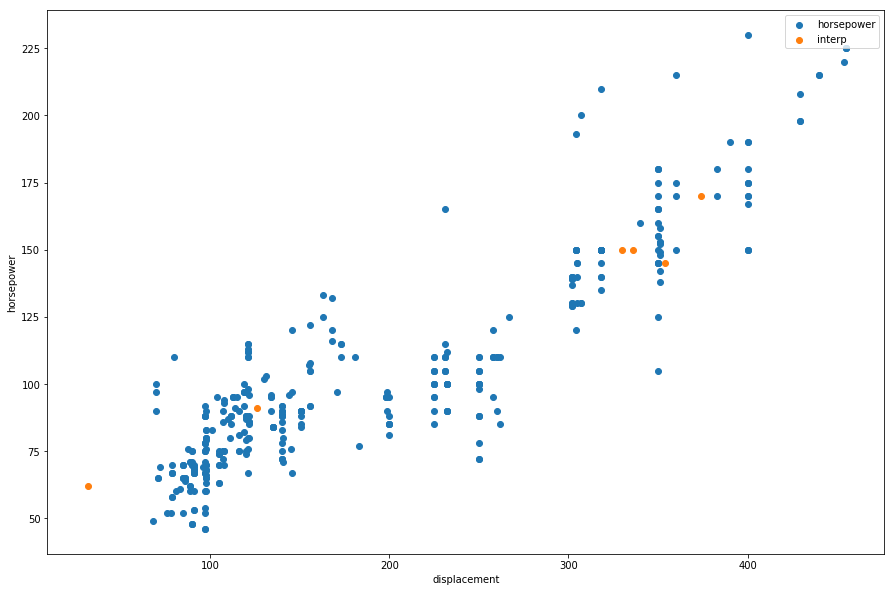

In [26]:
# first sort by displacement because there is a relationship
# between displacement and horsepower
# (horsepower rows nearby are related / proportional to displacement)
df1 = df.sort_values(['displacement'])

# then interpolating will make more sense
# because interpolate uses surrounding hp values
df2 = df1.interpolate()

# plot (optional)
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(df1['displacement'], df1['horsepower'])
ax.set(xlabel='displacement', ylabel='horsepower')

index = df1[df1.isna().any(axis=1)].index
ax.scatter(index, df2.iloc[index]['horsepower'], label='interp')
ax.legend()

In [27]:
# option 3: fill

In [28]:
# df1 = df.fillna(123)
# df1 = df.fillna(df.mean()) # per-column mean
# df1 = df.fillna(df.median()) # per-column median

# should use this first df1 = df.sort_values(['displacement'])
df1 = df.fillna(method='bfill')

index = df[df.isna().any(axis=1)].index
print(index)
df1.iloc[index]

Int64Index([32, 126, 330, 336, 354, 374], dtype='int64')


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,100.0,2046.0,19.0,71,1
126,21.0,6,200.0,100.0,2875.0,17.0,74,1
330,40.9,4,85.0,67.0,1835.0,17.3,80,2
336,23.6,4,140.0,72.0,2905.0,14.3,80,1
354,34.5,4,100.0,75.0,2320.0,15.8,81,2
374,23.0,4,151.0,74.0,3035.0,20.5,82,1


In [29]:
# encode categorical data?

# 2 ways
# 1. Label encode
# 2. One-hot encode

In [30]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

In [31]:
df['model year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

In [32]:
df['cylinders'].unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [33]:
# Example 1
le = LabelEncoder()
le.fit(['apple', 'apple', 'banana', 'pear'])
print(le.classes_)
print(le.transform(['apple', 'apple', 'banana', 'pear']))
print(le.inverse_transform([0, 0, 1, 2]))

['apple' 'banana' 'pear']
[0 0 1 2]
['apple' 'apple' 'banana' 'pear']


In [34]:
df_fruits = pd.DataFrame(['apple', 'apple', 'banana', 'pear'],
                        columns=['fruit'])

# setup the encoder
le = LabelEncoder()
le.fit(df_fruits['fruit'])

# do the encoding
df_fruits['fruit_encoded'] = le.transform(df_fruits['fruit'])
df_fruits

# if you like a different offset than 0
# df_fruits['fruit_encoded'] = df_fruits['fruit_encoded'] + 10

,fruit,fruit_encoded
0,apple,0
1,apple,0
2,banana,1
3,pear,2


In [35]:
# Example 2
df_fruits = pd.DataFrame(['apple', 'apple', 'banana', 'pear'],
                        columns=['fruit'])

df1 = pd.concat([df_fruits, pd.get_dummies(df_fruits)], axis=1)
df1

,fruit,fruit_apple,fruit_banana,fruit_pear
0,apple,1,0,0
1,apple,1,0,0
2,banana,0,1,0
3,pear,0,0,1


In [36]:
# let's practice encoding model year
# Note that encoding can be done on any data type

# setup the encoder
le = LabelEncoder()
le.fit(df['model year'])
print(le.classes_)

# do the encoding
df['model year encoded'] = le.transform(df['model year'])
df

[70 71 72 73 74 75 76 77 78 79 80 81 82]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,model year encoded
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,0
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,0
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,0
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,0
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,0


In [37]:
df1 = pd.concat([df, pd.get_dummies(df['model year'])], axis=1)
df1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,model year encoded,70,...,73,74,75,76,77,78,79,80,81,82
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,0,1,...,0,0,0,0,0,0,0,0,0,0
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,0,1,...,0,0,0,0,0,0,0,0,0,0
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,0,1,...,0,0,0,0,0,0,0,0,0,0
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,0,1,...,0,0,0,0,0,0,0,0,0,0
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,0,1,...,0,0,0,0,0,0,0,0,0,0


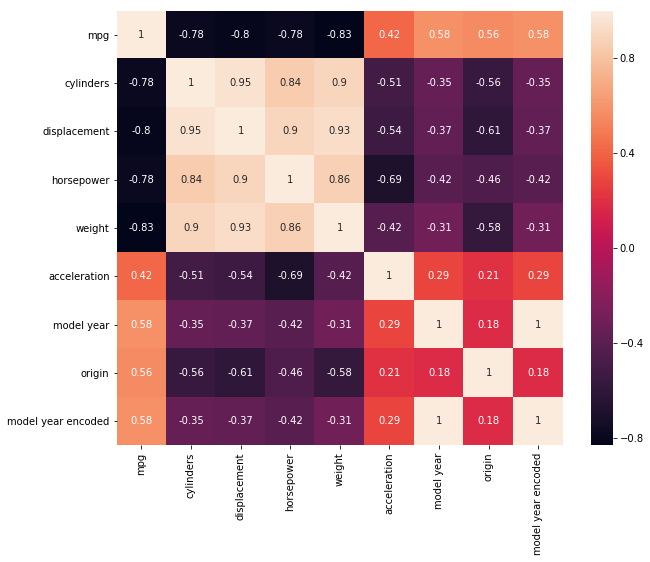

In [38]:
# explore correlation and pairplot

df.corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, ax=ax)

C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\mldds\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\mldds\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


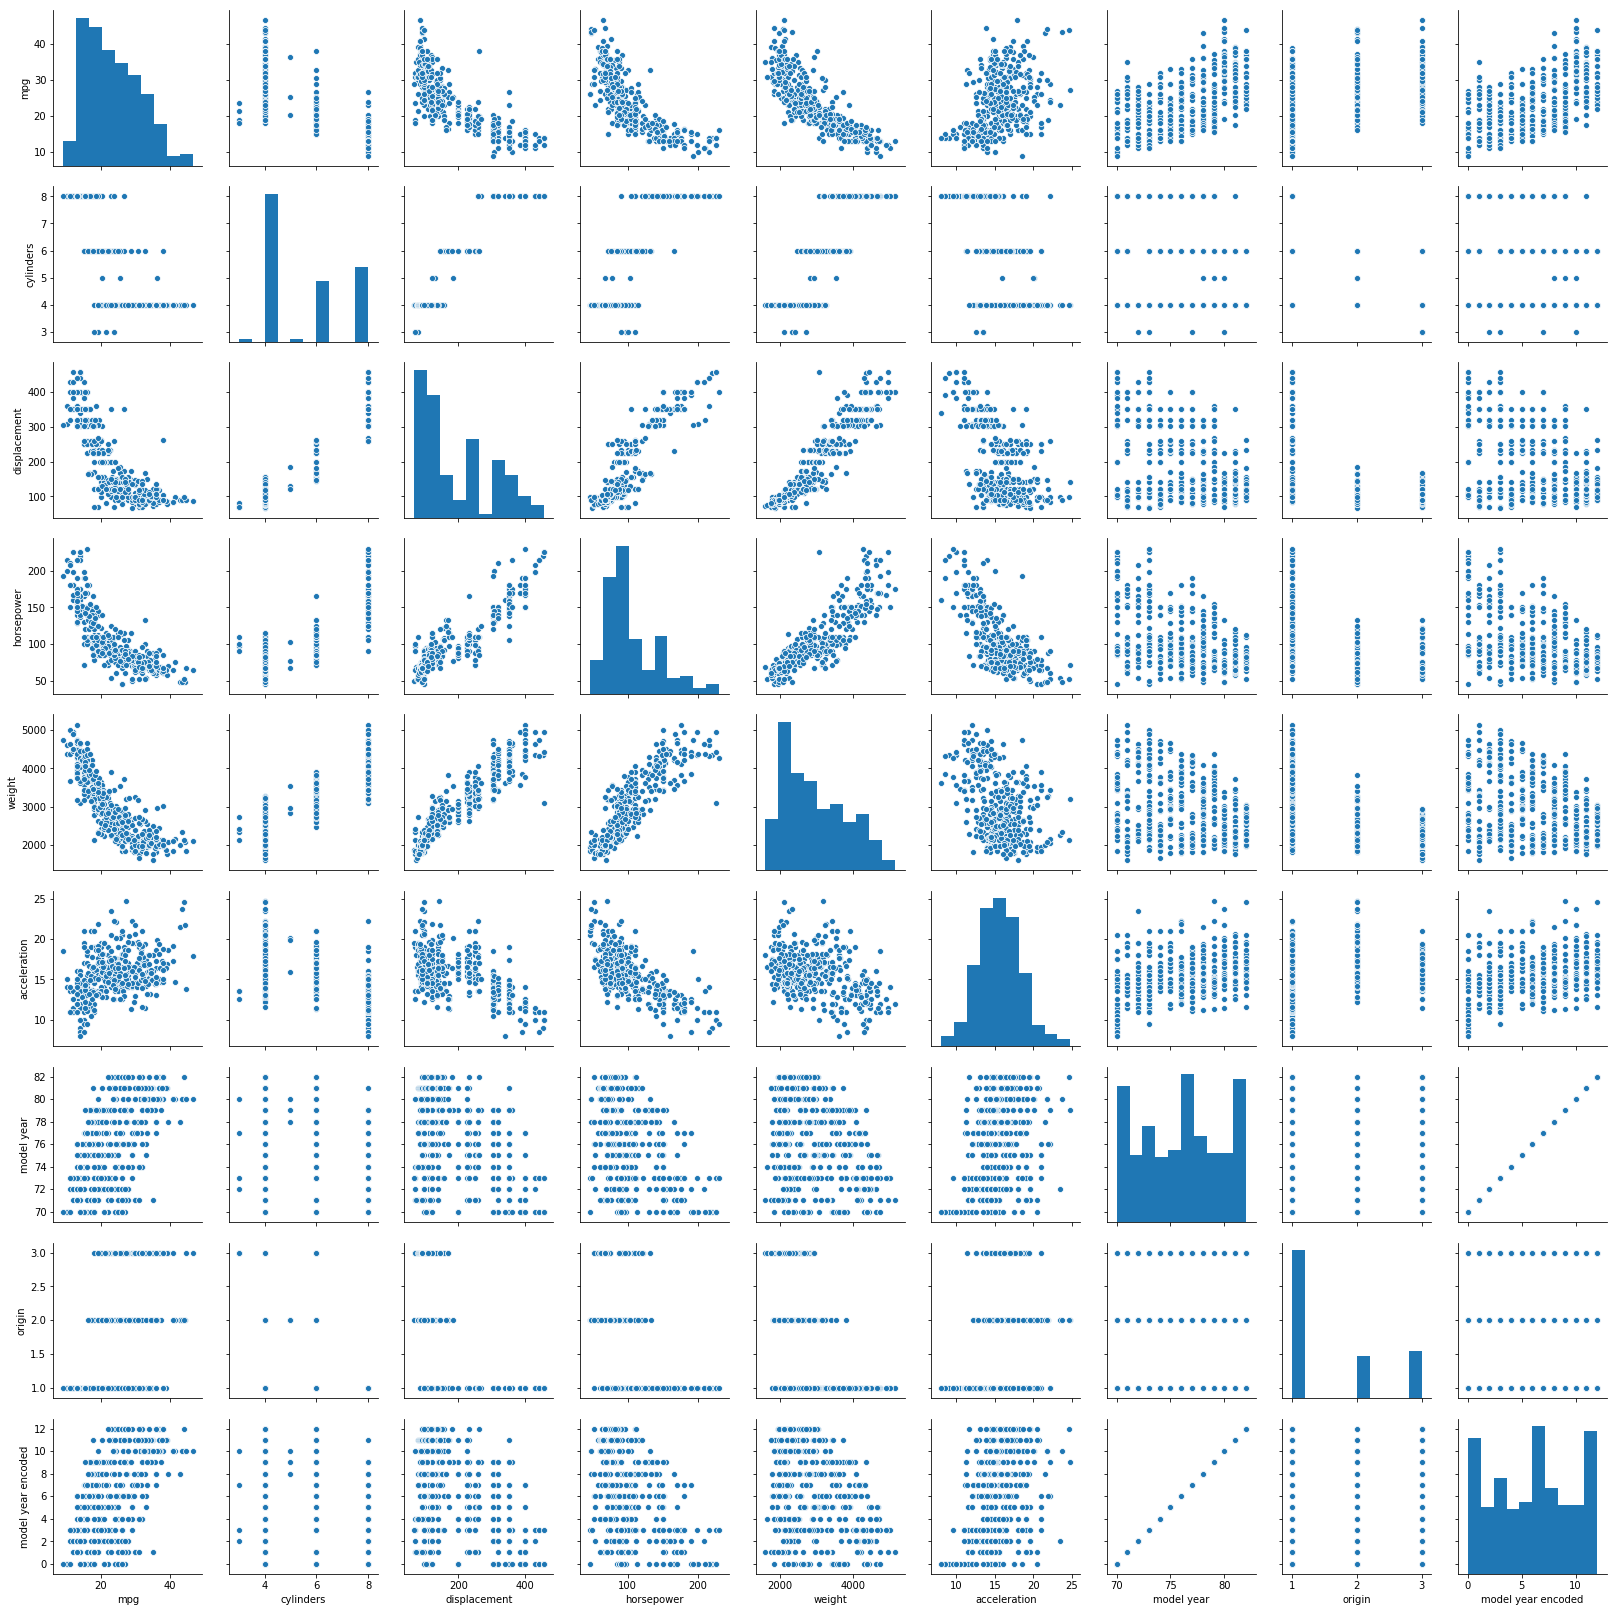

In [39]:
sns.pairplot(df)

In [40]:
# PCA
# Goal: plot all 8 features at the same time with target (y)
# PCA is a technique to reduce to 2 or 3 dimensions

# Principal Component Analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# make sure df is cleaned
df.dropna(inplace=True)
X = df.loc[:, df.columns != 'mpg']
y = df['mpg']

# best practice is to scale before performing PCA
# (because PCA uses covariance which is sensitive to scaling)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

pca = PCA(n_components=1) # X in 1-d so we can plot X vs y in 2-d
pca.fit(X_scaled) # setup to compute PCA

Z = pca.transform(X_scaled) # actually perform PCA

# dimension is 1 only because we want to plot
print('before', X.shape, 'after', Z.shape)
Z

before (392, 8) after (392, 1)


C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\mldds\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


array([[ 3.02634968],
       [ 3.73129148],
       [ 3.36279407],
       [ 3.19896971],
       [ 3.24547682],
       [ 4.8889943 ],
       [ 5.3443315 ],
       [ 5.26358529],
       [ 5.33305093],
       [ 4.55992572],
       [ 4.01663536],
       [ 3.96023627],
       [ 4.01539283],
       [ 4.6874636 ],
       [-0.69642967],
       [ 1.01303864],
       [ 1.01065515],
       [ 0.74084176],
       [-0.90380368],
       [-1.78414716],
       [-0.56393681],
       [-0.34674136],
       [-0.64424792],
       [ 0.07775298],
       [ 0.92539601],
       [ 4.50418552],
       [ 3.90079976],
       [ 4.21552398],
       [ 3.6176637 ],
       [-1.0437565 ],
       [-0.18555767],
       [-0.80134607],
       [ 1.23376338],
       [ 1.38658418],
       [ 1.38214948],
       [ 1.23757444],
       [ 1.2879219 ],
       [ 3.78789123],
       [ 4.2795334 ],
       [ 3.47725573],
       [ 3.33212502],
       [ 4.50075721],
       [ 4.30844938],
       [ 4.55322859],
       [ 1.55685739],
       [-0

[Text(0, 0.5, 'mpg'),
 Text(0.5, 0, '1-d PCA projection of data'),
 Text(0.5, 1.0, 'PCA of data vs. mpg')]

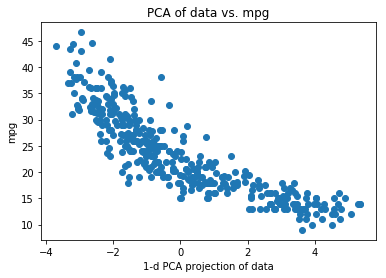

In [41]:
# plot Z vs. y to explore relationship
fig, ax = plt.subplots()
ax.scatter(Z, y)
ax.set(title='PCA of data vs. mpg',
      xlabel='1-d PCA projection of data',
      ylabel='mpg')

In [42]:
# For this dataset, the 1-d projection captures 61% of the
# variance in the samples
pca.explained_variance_ratio_

array([0.60953764])

In [43]:
# Plotting 3-d

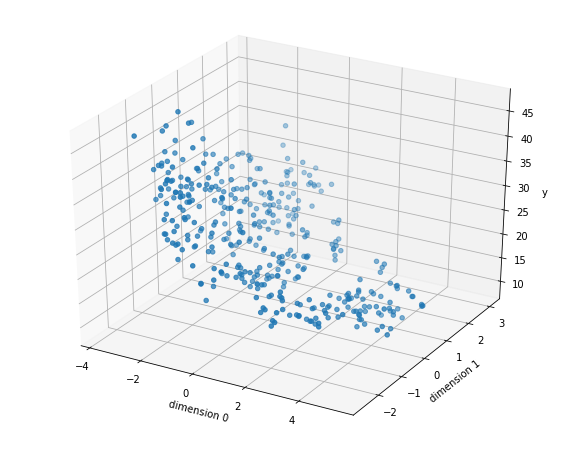

In [44]:
%matplotlib inline
#%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

pca2 = PCA(n_components=2)
pca2.fit(X_scaled)
Z2 = pca2.transform(X_scaled)

# plot Z2[0], Z2[1] vs y in 3-d
ax.scatter(Z2[:, 0], Z2[:, 1], y)
ax.set_xlabel('dimension 0')
ax.set_ylabel('dimension 1')
ax.set_zlabel('y')
plt.show()

In [57]:
# Train test split


In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(294, 8) (98, 8) (294,) (98,)


In [64]:
import sklearn
print(sklearn.__version__)

0.20.0


In [78]:
# Cross validation
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDRegressor

# define our model
#   Linear Regression using Gradient Descent

# scale X_train to normalise the feature ranges
X_scaler = StandardScaler()
Z_train = X_scaler.fit_transform(X_train)

model = SGDRegressor(max_iter=1000, tol=1e-3,
                     random_state=8)

# scores should look like this (k entries, one for each group):
# [ {train_score: xxx, test_score: yyy, ...}, # [T,T,T,T,V]
#   {train_score: xxx, test_score: yyy, ...}, # [T,T,T,V,T]
# ]
scores = cross_validate(model, Z_train, y_train, cv=5,
                        return_train_score=True,
                        return_estimator=True) # models
scores

C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\mldds\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\mldds\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


{'fit_time': array([0.00301242, 0.00300646, 0.00501156, 0.00401664, 0.00400996]),
 'score_time': array([0.00099659, 0.00100279, 0.00100327, 0.00050235, 0.00050259]),
 'estimator': (SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
         eta0=0.01, fit_intercept=True, l1_ratio=0.15,
         learning_rate='invscaling', loss='squared_loss', max_iter=1000,
         n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
         random_state=8, shuffle=True, tol=0.001, validation_fraction=0.1,
         verbose=0, warm_start=False),
  SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
         eta0=0.01, fit_intercept=True, l1_ratio=0.15,
         learning_rate='invscaling', loss='squared_loss', max_iter=1000,
         n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
         random_state=8, shuffle=True, tol=0.001, validation_fraction=0.1,
         verbose=0, warm_start=False),
  SGDRegressor(alpha=0.0001, average=Fa

In [99]:
# Regressor scores usually R2
#SGDRegressor.score?

# in contrast Classifier scores usually use mean accuracy
#from sklearn.linear_model import SGDClassifier
#SGDClassifier.score?

In [85]:
# Get the W and bias for each fitted linear regressor
for m in scores['estimator']:
    print('W', m.coef_, 'bias', m.intercept_)

W [-0.69858044 -0.31502832 -0.82599305 -3.47967516 -0.63774288  1.34473514
  1.10666684  1.34473514] bias [23.34985265]
W [-0.6902461   0.55167742 -1.31779041 -3.64022609 -0.58831943  1.47683644
  1.23617036  1.47683644] bias [23.3038245]
W [-0.84776772  1.80854209 -0.83056217 -4.77521735 -0.064641    1.44173201
  1.35059543  1.44173201] bias [23.17615131]
W [-0.88848904  0.8328933  -0.29853912 -4.26533126 -0.0754265   1.43563587
  1.56772049  1.43563587] bias [23.36274685]
W [-0.79911053  1.02552144 -1.12622249 -4.29232713 -0.49679172  1.48052302
  1.14909091  1.48052302] bias [23.27421138]


In [86]:
X.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year', 'origin', 'model year encoded'],
      dtype='object')

In [96]:
# Score for test set (the 25% from train_test_split)
# Note that 'test_score' returned by cross_validate is actually
# 'validation score'. (easy to confuse)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

models = scores['estimator']

# let's see the first model
Z_test = X_scaler.transform(X_test) # common mistake is to use
                                    # X_scaler.fit_transform
                                    # which will reset the scaler
y_pred = models[0].predict(Z_test)

print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred)) # scale-invariant

MSE: 12.51525442084269
MAE: 2.6473339139533385
R2: 0.7917869381101873


C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
y_pred

In [ ]:
y_test

In [ ]:
# Saving model and loading

In [111]:
import pickle

# Inventory
# - X_scaler
# - models

# opening file in 'write binary' mode
pickle.dump(X_scaler, open('day4_training_scaler.pk', 'wb'))
pickle.dump(models, open('day4_training_models.pk', 'wb'))

In [118]:
# pretend this is another machine
# or another python notebook / python script

import pickle

# opening file in 'read binary' model
X_scaler1 = pickle.load(open('day4_training_scaler.pk', 'rb'))
models1 = pickle.load(open('day4_training_models.pk', 'rb'))

# try getting predictions from the unpicked model and scaler
Z_test1 = X_scaler1.transform(X_test)
y_pred1 = models1[0].predict(Z_test1)

r2_score(y_test, y_pred1)

C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


array([29.88469905, 25.3466489 , 17.40449161, 29.2806466 , 24.42347952,
       27.32709801, 23.12680268, 23.92031677, 27.08528118, 27.17258042,
       26.03062796, 27.71977507, 26.65945798, 15.46511573, 13.17061555,
       20.64217732, 24.82141421, 30.84941491, 23.85927804, 20.04171793,
       28.21344298, 32.01577438, 14.11659566, 26.54589034, 25.706336  ,
       20.55669741, 12.11719093, 22.07134884, 17.26229996, 35.24059788,
       35.88076883, 32.50784439, 12.50508784,  7.08371179, 27.14931622,
       22.87193973, 26.37983897, 27.88441513, 16.82219643, 17.39357807,
       34.07963833, 16.49933143,  9.47145528, 28.62047268, 26.33218612,
       28.72615445, 23.33531366, 33.58364233, 27.25238144, 20.08295941,
       29.00353833, 26.92627444, 31.82431032, 14.88993682, 13.57258033,
       21.05413717, 17.79412591, 28.98747153, 16.75831917, 25.76702297,
       29.96372908, 16.71224643,  9.20222059, 32.8894165 , 20.18334049,
       29.33879882, 27.16196982, 29.92308076, 25.00089027, 30.82

In [ ]:
# Experiment with learning rate